In [1]:
import seaborn as sns; sns.set()
sns.set(color_codes=True)
sns.set(font_scale=1.2)



from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, jaccard_score, hamming_loss, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.utils.multiclass import unique_labels

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterSampler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline, make_union
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

# CLASSIFIERS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

#REGRESSORS
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor


from scipy.spatial.distance import cdist, pdist
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn import (manifold, decomposition, ensemble,
                     discriminant_analysis, random_projection)

import statistics
#plt.style.use('seaborn')

import numpy as np
import tensorflow as tf


import warnings
warnings.filterwarnings('ignore')


import utilities
%matplotlib inline


SEED = 3
import os
import random as rn

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
rn.seed(SEED)

name_prefix = 'wild'


In [2]:
# Data preparation
def data_preparation():
    
    MXene = MXene.strip()
    MXene = MXene.replace(' ', '')
    elements = MXene.split('2', 1)
    M = elements[0]
    X = elements[1][0]
    T = elements[1][1:]
    print(M, X, T)

In [3]:
# Evaluation
def multi_output_score(test, pred):
    true = 0
    for i in range(len(test)):
        if test[i]==pred[i]:
            true = true + 1
    return true/len(test)

In [4]:
# load data from csv file
def load_data(filename='data.csv'):
    X_df = pd.read_csv(filename)
    X_df = X_df.fillna(0)
    return X_df

In [5]:
def evaluation(true, pred):
    index_abs = 0
    jaccard_score_list = []
    hamming_score_list = []
    f1_score_list = []
    precision_score_list = []
    recall_score_list = []
    pred = pred.tolist()
    for row in true:
        single_score = jaccard_score(row, pred[index_abs], average='micro')
        hammung_score = hamming_loss(row, pred[index_abs])
        recall = recall_score(row, pred[index_abs], average='micro')
        precision = precision_score(row, pred[index_abs], average='micro')
        f1 = f1_score(row, pred[index_abs], average='micro')
        jaccard_score_list.append(single_score)
        hamming_score_list.append(hammung_score)
        precision_score_list.append(precision)
        recall_score_list.append(recall)
        f1_score_list.append(f1)
        index_abs = index_abs + 1
    return jaccard_score_list, hamming_score_list, f1_score_list, precision_score_list, recall_score_list


## Load data and preprocess

In [6]:
import pandas as pd

X_df = load_data('Gold_dataset/Au_nanoparticle_dataset.csv')
X_df.describe()

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4.000000e+03,4000.000000,4000.000000,...,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.000000,4000.000000
mean,2000.500000,615.000000,0.000055,8.200000,3476.786500,2521.550250,955.23625,5.885368e-26,16.436127,26.028875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12742.661846,851.243153
std,1154.844867,223.625808,0.000081,2.856929,3679.286769,2976.232459,721.87022,6.227819e-26,6.761951,9.822659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13690.999369,771.395830
min,1.000000,273.000000,0.000000,1.000000,236.000000,89.000000,137.00000,4.000000e-27,0.519100,9.665200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-53772.854000,0.000000
25%,1000.750000,410.500000,0.000000,7.000000,1061.000000,618.750000,437.00000,1.800000e-26,11.898975,18.570825,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-16504.678000,334.640675
50%,2000.500000,598.000000,0.000000,10.000000,1867.000000,1199.000000,666.00000,3.160000e-26,14.914300,22.978850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6754.782950,553.118000
75%,3000.250000,785.500000,0.000100,10.000000,4503.000000,3183.000000,1301.75000,7.620000e-26,19.352375,34.207525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3786.450450,1107.184500
max,4000.000000,973.000000,0.000250,10.000000,14277.000000,11580.000000,3190.00000,2.420000e-25,35.136500,66.289500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-783.428590,4470.351000


In [7]:
# TODO: 5 cases 
feature_set_surface = ['N_surface', 'S_100', 'S_111', 'S_110', 'S_311', 'Curve_1-10', 'Curve_11-20', 'Curve_21-30', 'Curve_31-40', 'Curve_41-50', 'Curve_51-60', 'Curve_61-70', 'Curve_71-80', 'Avg_surf', 'SCN_1', 'SCN_2', 'SCN_3', 'SCN_4', 'SCN_5', 'SCN_6', 'SCN_7', 'SCN_8', 'SCN_9', 'SCN_10', 'SCN_11', 'SCN_12', 'SCN_13', 'SCN_14', 'SCN_15', 'q6q6_S0', 'q6q6_S1', 'q6q6_S2', 'q6q6_S3', 'q6q6_S4', 'q6q6_S5', 'q6q6_S6', 'q6q6_S7', 'q6q6_S8', 'q6q6_S9', 'q6q6_S10', 'q6q6_S11', 'q6q6_S12', 'q6q6_S13']
feature_set_total = ['N_total', 'Volume', 'R_min', 'R_max', 'R_diff', 'R_avg', 'R_std', 'R_skew', 'R_kurt', 'Avg_total', 'TCN_1', 'TCN_2', 'TCN_3', 'TCN_4', 'TCN_5', 'TCN_6', 'TCN_7', 'TCN_8', 'TCN_9', 'TCN_10', 'TCN_11', 'TCN_12', 'TCN_13', 'TCN_14', 'TCN_15', 'TCN_16', 'TCN_17', 'Avg_bonds', 'Std_bonds', 'Max_bonds', 'Min_bonds', 'N_bonds', 'angle_avg', 'angle_std', 'q6q6_avg_total', 'q6q6_avg_bulk', 'q6q6_avg_surf', 'q6q6_T0', 'q6q6_T1', 'q6q6_T2', 'q6q6_T3', 'q6q6_T4', 'q6q6_T5', 'q6q6_T6', 'q6q6_T7', 'q6q6_T8', 'q6q6_T9', 'q6q6_T10', 'q6q6_T11', 'q6q6_T12', 'q6q6_T13', 'q6q6_T14', 'q6q6_T15']
feature_set_condensed = ['N_total', 'N_bulk', 'N_surface', 'Volume', 'R_min', 'R_max', 'R_diff', 'R_avg', 'R_std', 'R_skew', 'R_kurt', 'S_100', 'S_111', 'S_110', 'S_311', 'Curve_1-10', 'Curve_11-20', 'Curve_21-30', 'Curve_31-40', 'Curve_41-50', 'Curve_51-60', 'Curve_61-70', 'Curve_71-80', 'Avg_bulk', 'Avg_total', 'Avg_surf', 'TCN_1', 'TCN_2', 'TCN_3', 'TCN_4', 'TCN_5', 'TCN_6', 'TCN_7', 'TCN_8', 'TCN_9', 'TCN_10', 'TCN_11', 'TCN_12', 'TCN_13', 'TCN_14', 'TCN_15', 'TCN_16', 'TCN_17', 'BCN_5', 'BCN_6', 'BCN_7', 'BCN_8', 'BCN_9', 'BCN_10', 'BCN_11', 'BCN_12', 'BCN_13', 'BCN_14', 'BCN_15', 'BCN_16', 'BCN_17', 'SCN_1', 'SCN_2', 'SCN_3', 'SCN_4', 'SCN_5', 'SCN_6', 'SCN_7', 'SCN_8', 'SCN_9', 'SCN_10', 'SCN_11', 'SCN_12', 'SCN_13', 'SCN_14', 'SCN_15', 'Avg_bonds', 'Std_bonds', 'Max_bonds', 'Min_bonds', 'N_bonds', 'angle_avg', 'angle_std', 'FCC', 'HCP', 'ICOS', 'DECA','q6q6_avg_total', 'q6q6_avg_bulk', 'q6q6_avg_surf', 'q6q6_T0', 'q6q6_T1', 'q6q6_T2', 'q6q6_T3', 'q6q6_T4', 'q6q6_T5', 'q6q6_T6', 'q6q6_T7', 'q6q6_T8', 'q6q6_T9', 'q6q6_T10', 'q6q6_T11', 'q6q6_T12', 'q6q6_T13', 'q6q6_T14', 'q6q6_T15',  'q6q6_B0', 'q6q6_B1', 'q6q6_B2', 'q6q6_B3', 'q6q6_B4', 'q6q6_B5', 'q6q6_B6', 'q6q6_B7', 'q6q6_B8', 'q6q6_B9', 'q6q6_B10', 'q6q6_B11', 'q6q6_B12', 'q6q6_B13', 'q6q6_B14', 'q6q6_B15', 'q6q6_S0', 'q6q6_S1', 'q6q6_S2', 'q6q6_S3', 'q6q6_S4', 'q6q6_S5', 'q6q6_S6', 'q6q6_S7', 'q6q6_S8', 'q6q6_S9', 'q6q6_S10', 'q6q6_S11', 'q6q6_S12', 'q6q6_S13']
feature_set_expanded = ['N_total', 'N_bulk', 'N_surface', 'Volume', 'R_min', 'R_max', 'R_diff', 'R_avg', 'R_std', 'R_skew', 'R_kurt', 'S_100', 'S_111', 'S_110', 'S_311', 'Curve_1', 'Curve_2', 'Curve_3', 'Curve_4', 'Curve_5', 'Curve_6','Curve_7', 'Curve_8', 'Curve_9', 'Curve_10', 'Curve_11','Curve_12', 'Curve_13', 'Curve_14', 'Curve_15', 'Curve_16','Curve_17', 'Curve_18', 'Curve_19', 'Curve_20', 'Curve_21', 'Curve_22', 'Curve_23', 'Curve_24', 'Curve_25', 'Curve_26', 'Curve_27', 'Curve_28', 'Curve_29', 'Curve_30', 'Curve_31', 'Curve_32', 'Curve_33', 'Curve_34', 'Curve_35', 'Curve_36', 'Curve_37', 'Curve_38', 'Curve_39', 'Curve_40', 'Curve_41', 'Curve_42', 'Curve_43', 'Curve_44', 'Curve_45', 'Curve_46', 'Curve_47', 'Curve_48', 'Curve_49', 'Curve_50', 'Curve_51', 'Curve_52', 'Curve_53', 'Curve_54', 'Curve_55', 'Curve_56', 'Curve_57', 'Curve_58', 'Curve_59', 'Curve_60', 'Curve_61', 'Curve_62', 'Curve_63', 'Curve_64', 'Curve_65', 'Curve_66', 'Curve_67', 'Curve_68', 'Curve_69', 'Curve_70', 'Curve_71', 'Curve_72', 'Curve_73', 'Curve_74', 'Curve_75', 'Curve_76', 'Curve_77', 'Curve_78', 'Curve_79', 'Curve_80', 'Avg_bulk', 'Avg_total', 'Avg_surf', 'TCN_1', 'TCN_2', 'TCN_3', 'TCN_4', 'TCN_5', 'TCN_6', 'TCN_7', 'TCN_8', 'TCN_9', 'TCN_10', 'TCN_11', 'TCN_12', 'TCN_13', 'TCN_14', 'TCN_15', 'TCN_16', 'TCN_17', 'BCN_5', 'BCN_6', 'BCN_7', 'BCN_8', 'BCN_9', 'BCN_10', 'BCN_11', 'BCN_12', 'BCN_13', 'BCN_14', 'BCN_15', 'BCN_16', 'BCN_17', 'SCN_1', 'SCN_2', 'SCN_3', 'SCN_4', 'SCN_5', 'SCN_6', 'SCN_7', 'SCN_8', 'SCN_9', 'SCN_10', 'SCN_11', 'SCN_12', 'SCN_13', 'SCN_14', 'SCN_15', 'SCNO_0', 'SCNO_1', 'SCNO_2', 'SCNO_3', 'SCNO_4', 'SCNO_5', 'SCNO_6', 'SCNO_7', 'SCNO_8', 'SCNO_9', 'SCNO_10', 'SCNO_11', 'SCNO_12', 'SCNO_13', 'Avg_bonds', 'Std_bonds', 'Max_bonds', 'Min_bonds', 'N_bonds', 'angle_avg', 'angle_std', 'FCC', 'HCP', 'ICOS', 'DECA','q6q6_avg_total', 'q6q6_avg_bulk', 'q6q6_avg_surf', 'q6q6_T0', 'q6q6_T1', 'q6q6_T2', 'q6q6_T3', 'q6q6_T4', 'q6q6_T5', 'q6q6_T6', 'q6q6_T7', 'q6q6_T8', 'q6q6_T9', 'q6q6_T10', 'q6q6_T11', 'q6q6_T12', 'q6q6_T13', 'q6q6_T14', 'q6q6_T15',  'q6q6_B0', 'q6q6_B1', 'q6q6_B2', 'q6q6_B3', 'q6q6_B4', 'q6q6_B5', 'q6q6_B6', 'q6q6_B7', 'q6q6_B8', 'q6q6_B9', 'q6q6_B10', 'q6q6_B11', 'q6q6_B12', 'q6q6_B13', 'q6q6_B14', 'q6q6_B15', 'q6q6_S0', 'q6q6_S1', 'q6q6_S2', 'q6q6_S3', 'q6q6_S4', 'q6q6_S5', 'q6q6_S6', 'q6q6_S7', 'q6q6_S8', 'q6q6_S9', 'q6q6_S10', 'q6q6_S11', 'q6q6_S12', 'q6q6_S13']
feature_set_bulk = ['N_bulk', 'Avg_bulk', 'BCN_5', 'BCN_6', 'BCN_7', 'BCN_8', 'BCN_9', 'BCN_10', 'BCN_11', 'BCN_12', 'BCN_13', 'BCN_14', 'BCN_15', 'BCN_16', 'BCN_17', 'FCC', 'HCP', 'ICOS', 'DECA', 'q6q6_B0', 'q6q6_B1', 'q6q6_B2', 'q6q6_B3', 'q6q6_B4', 'q6q6_B5', 'q6q6_B6', 'q6q6_B7', 'q6q6_B8', 'q6q6_B9', 'q6q6_B10', 'q6q6_B11', 'q6q6_B12', 'q6q6_B13', 'q6q6_B14', 'q6q6_B15']


In [8]:
name_prefix = 'surface'


X_features = X_df[feature_set_surface] 
feature_names = X_features.columns.values

y_multilabel = X_df.iloc[:,-1:] 
label_names = y_multilabel.columns.values

In [9]:
print('Feature names: \n', feature_names)
print('Label names: ', label_names)

Feature names: 
 ['N_surface' 'S_100' 'S_111' 'S_110' 'S_311' 'Curve_1-10' 'Curve_11-20'
 'Curve_21-30' 'Curve_31-40' 'Curve_41-50' 'Curve_51-60' 'Curve_61-70'
 'Curve_71-80' 'Avg_surf' 'SCN_1' 'SCN_2' 'SCN_3' 'SCN_4' 'SCN_5' 'SCN_6'
 'SCN_7' 'SCN_8' 'SCN_9' 'SCN_10' 'SCN_11' 'SCN_12' 'SCN_13' 'SCN_14'
 'SCN_15' 'q6q6_S0' 'q6q6_S1' 'q6q6_S2' 'q6q6_S3' 'q6q6_S4' 'q6q6_S5'
 'q6q6_S6' 'q6q6_S7' 'q6q6_S8' 'q6q6_S9' 'q6q6_S10' 'q6q6_S11' 'q6q6_S12'
 'q6q6_S13']
Label names:  ['Formation_E']


<Figure size 360x360 with 0 Axes>

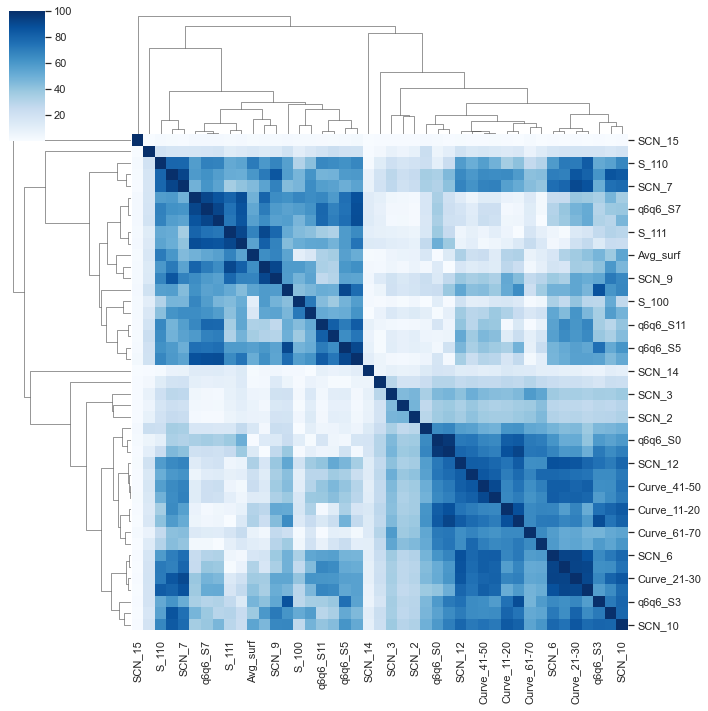

,N_surface,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,...,q6q6_S4,q6q6_S5,q6q6_S6,q6q6_S7,q6q6_S8,q6q6_S9,q6q6_S10,q6q6_S11,q6q6_S12,q6q6_S13
N_surface,100.000000,47.219834,51.074004,79.058257,61.405981,71.687940,64.910467,85.264109,80.408589,64.999366,...,57.140885,58.342615,59.158138,62.191935,58.952951,50.278266,57.131646,47.367310,48.394481,17.321814
S_100,47.219834,100.000000,44.513107,31.455437,72.227405,58.516242,16.792822,39.968902,28.623204,10.892942,...,42.730553,47.874712,57.348304,57.716254,67.140770,50.452589,46.766865,43.691215,37.288228,10.789639
S_111,51.074004,44.513107,100.000000,52.306270,42.147600,90.792547,5.481553,14.398337,16.956219,5.363989,...,51.817219,58.579590,64.934398,74.349007,79.907269,91.375821,72.618873,35.283852,32.107910,11.961720
S_110,79.058257,31.455437,52.306270,100.000000,42.421039,59.749933,35.317298,71.175427,83.054003,56.770384,...,56.552060,62.484409,66.718156,68.977159,57.495253,54.639756,68.271062,66.102654,64.670157,19.199227
S_311,61.405981,72.227405,42.147600,42.421039,100.000000,53.761562,32.623072,61.004339,46.039593,30.438009,...,46.141655,50.865521,61.701949,61.809293,64.086887,53.213001,57.689338,51.774107,49.461716,15.382329
Curve_1-10,71.687940,58.516242,90.792547,59.749933,53.761562,100.000000,27.899756,35.708247,34.430039,14.457502,...,58.423465,60.096914,63.281294,70.912327,79.710662,81.382052,64.226483,33.398955,31.609318,13.402355
Curve_11-20,64.910467,16.792822,5.481553,35.317298,32.623072,27.899756,100.000000,67.230835,50.874147,66.880832,...,51.671754,33.521698,17.062290,2.278603,6.868791,7.956115,4.151747,2.168869,11.753284,13.911823
Curve_21-30,85.264109,39.968902,14.398337,71.175427,61.004339,35.708247,67.230835,100.000000,90.783979,79.670582,...,53.681802,55.923715,55.738907,47.973567,38.829276,20.676016,45.640806,60.664101,60.490576,18.940758
Curve_31-40,80.408589,28.623204,16.956219,83.054003,46.039593,34.430039,50.874147,90.783979,100.000000,81.734652,...,46.703797,52.883129,55.542354,51.499056,37.219772,25.904599,51.641773,67.177510,65.493533,18.405493
Curve_41-50,64.999366,10.892942,5.363989,56.770384,30.438009,14.457502,66.880832,79.670582,81.734652,100.000000,...,43.455180,40.121821,30.127407,21.530420,11.982274,2.493615,22.758094,39.711458,45.418991,16.564201


In [10]:
import matplotlib.pyplot as plt

# Correlation Coefficient Filter

sns.set()
correlated = X_features.corr(method='spearman').abs().mul(100).astype(float)
plt.figure(figsize=(5,5))
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=50, as_cmap=True)
cg = sns.clustermap(data = correlated, cmap='Blues', metric='correlation')
#cg = sns.clustermap(data = correlated, cmap='Blues', metric='correlation', annot =False, fmt='1g')
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

plt.savefig('./Gold/correlation_matrix_{}.png'.format(name_prefix), dpi=300, bbox_inches='tight')
plt.show()
correlated




In [22]:
# print correlated features
for c1 in feature_names:
  for c2 in feature_names:
    if c1 != c2 and correlated[c1][c2] > 95:
        print(c1, c2)

q6q6_S0 q6q6_S1
q6q6_S1 q6q6_S0


In [23]:
# data processing

from sklearn import preprocessing

X_scaled = preprocessing.StandardScaler().fit_transform(X_features)
y_scaled = preprocessing.StandardScaler().fit_transform(y_multilabel)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [13]:
# Build base model

base_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

base_model.compile(loss='mse', optimizer='adam', metrics=['mae'])

history = base_model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1, validation_data=(X_test, y_test), shuffle=True)

tf.keras.models.save_model(base_model, './Gold/base_model_{}.h5'.format(name_prefix))

print("Model saved!")

2021-12-09 21:52:29.033929: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-09 21:52:29.124727: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
320/320 [==============================] - 1s 983us/step - loss: 1.9014 - mae: 0.8964 - val_loss: 0.3841 - val_mae: 0.4435
Epoch 2/200
320/320 [==============================] - 0s 662us/step - loss: 0.3993 - mae: 0.3978 - val_loss: 0.2096 - val_mae: 0.3228
Epoch 3/200
320/320 [==============================] - 0s 637us/step - loss: 0.2692 - mae: 0.2994 - val_loss: 0.1405 - val_mae: 0.2546
Epoch 4/200
320/320 [==============================] - 0s 634us/step - loss: 0.2065 - mae: 0.2419 - val_loss: 0.1101 - val_mae: 0.2177
Epoch 5/200
320/320 [==============================] - 0s 621us/step - loss: 0.1702 - mae: 0.2083 - val_loss: 0.0919 - val_mae: 0.1974
Epoch 6/200
320/320 [==============================] - 0s 591us/step - loss: 0.1467 - mae: 0.1890 - val_loss: 0.0806 - val_mae: 0.1860
Epoch 7/200
320/320 [==============================] - 0s 624us/step - loss: 0.1296 - mae: 0.1788 - val_loss: 0.0737 - val_mae: 0.1759
Epoch 8/200
320/320 [==============================] - 

320/320 [==============================] - 0s 582us/step - loss: 0.0225 - mae: 0.0985 - val_loss: 0.0298 - val_mae: 0.1076
Epoch 122/200
320/320 [==============================] - 0s 607us/step - loss: 0.0225 - mae: 0.0996 - val_loss: 0.0289 - val_mae: 0.1077
Epoch 123/200
320/320 [==============================] - 0s 579us/step - loss: 0.0222 - mae: 0.0993 - val_loss: 0.0281 - val_mae: 0.1060
Epoch 124/200
320/320 [==============================] - 0s 588us/step - loss: 0.0228 - mae: 0.1006 - val_loss: 0.0319 - val_mae: 0.1147
Epoch 125/200
320/320 [==============================] - 0s 581us/step - loss: 0.0229 - mae: 0.0995 - val_loss: 0.0292 - val_mae: 0.1077
Epoch 126/200
320/320 [==============================] - 0s 584us/step - loss: 0.0226 - mae: 0.0996 - val_loss: 0.0291 - val_mae: 0.1055
Epoch 127/200
320/320 [==============================] - 0s 593us/step - loss: 0.0235 - mae: 0.1031 - val_loss: 0.0277 - val_mae: 0.1042
Epoch 128/200
320/320 [==============================] 

Epoch 181/200
320/320 [==============================] - 0s 589us/step - loss: 0.0224 - mae: 0.0992 - val_loss: 0.0278 - val_mae: 0.1079
Epoch 182/200
320/320 [==============================] - 0s 591us/step - loss: 0.0219 - mae: 0.0983 - val_loss: 0.0279 - val_mae: 0.1056
Epoch 183/200
320/320 [==============================] - 0s 585us/step - loss: 0.0220 - mae: 0.0998 - val_loss: 0.0321 - val_mae: 0.1167
Epoch 184/200
320/320 [==============================] - 0s 586us/step - loss: 0.0223 - mae: 0.0999 - val_loss: 0.0272 - val_mae: 0.1047
Epoch 185/200
320/320 [==============================] - 0s 614us/step - loss: 0.0216 - mae: 0.0987 - val_loss: 0.0297 - val_mae: 0.1108
Epoch 186/200
320/320 [==============================] - 0s 636us/step - loss: 0.0223 - mae: 0.0985 - val_loss: 0.0268 - val_mae: 0.1043
Epoch 187/200
320/320 [==============================] - 0s 631us/step - loss: 0.0221 - mae: 0.0988 - val_loss: 0.0274 - val_mae: 0.1045
Epoch 188/200
320/320 [==================

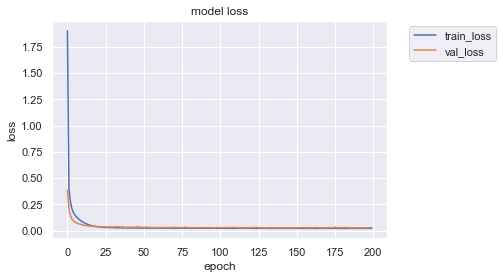

In [14]:
# plot training curve
plt.plot(history.history['loss'])
# plt.plot(history.history['mae'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_mae'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.savefig('./Gold/base_model_{}_loss_learning_curve.png'.format(name_prefix), dpi = 300, bbox_inches='tight')
plt.show()

In [17]:
import utilities

stop_call_back = utilities.EarlyStoppingByLossVal(monitor='loss', value=0.023, verbose=0)

base_model = tf.keras.models.load_model('./Gold/base_model_{}.h5'.format(name_prefix))

base_model.trainable = False

feature_model = utilities.Feature_Importance_Layer.make_feature_model(base_model, shape=(len(feature_names)))

opt = utilities.tf.keras.optimizers.Adam()

feature_model.compile(loss='mse', optimizer=opt, metrics=['mae'], run_eagerly=True)

history = feature_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_data=(X_test, y_test), shuffle=True, callbacks=[stop_call_back])


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 53)]              0         
_________________________________________________________________
feature_extractor (Sequentia (None, 53)                53        
_________________________________________________________________
sequential (Sequential)      (10, 1)                   54        
Total params: 107
Trainable params: 53
Non-trainable params: 54
_________________________________________________________________
Epoch 1/100
320/320 [==============================] - 2s 7ms/step - loss: 0.3727 - mae: 0.4007 - val_loss: 0.1740 - val_mae: 0.2498
Epoch 2/100
320/320 [==============================] - 2s 7ms/step - loss: 0.1214 - mae: 0.2077 - val_loss: 0.1278 - val_mae: 0.2138
Epoch 3/100
320/320 [==============================] - 2s 7ms/step - loss: 0.0963 - mae: 0.1859 - val_loss: 0.1081 - val_mae:

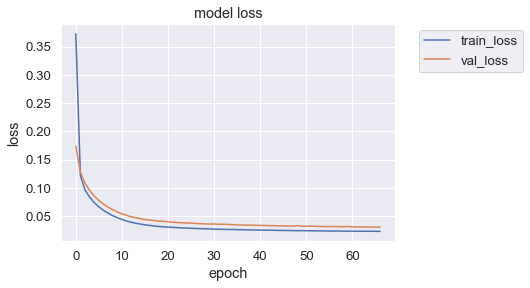

In [18]:
# plot training curve
plt.plot(history.history['loss'])
# plt.plot(history.history['mae'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_mae'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.savefig('./Gold/feature_model_{}_loss_learning_curve.png'.format(name_prefix), dpi = 300, bbox_inches='tight')
plt.show()

In [10]:
from copy import copy
import numpy as np
from numpy import arange

from scipy.spatial.distance import cdist,pdist
from scipy.stats import levene, pearsonr

from pandas import Series, DataFrame

from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D




def plot_feature_importance(ft_set, feature_importance, show_cols = 30):
    
    fig = plt.figure(figsize=(5,4))
    w_lr_sort, ft_sorted, _ = return_feature_importance(ft_set, feature_importance, show_cols = show_cols)
    x_val = list(range(len(w_lr_sort)))
    
    for i in range(16):
        plt.text(-0.3+i, 2, ft_sorted[i], rotation=90, fontsize=12)


    plt.bar(x_val, w_lr_sort)
    plt.ylabel('Ranking', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(x_val)
    
    return fig

def plot_feature_importance_reverse(ft_set, feature_importance, show_cols = 30):
    
    fig = plt.figure(figsize=(5,4))
    w_lr_sort, ft_sorted, _ = return_feature_importance(ft_set, feature_importance, show_cols = show_cols)
    x_val = list(range(len(w_lr_sort)))
    
    for i in range(16):
        plt.text(-0.3+i, 2, ft_sorted[i], rotation=90, fontsize=12)

    plt.bar(x_val, w_lr_sort, color='r')
    plt.ylabel('Ranking', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(x_val)
    
    return fig

def return_feature_importance(ft_set, feature_importance, show_cols = 30):

    w_lr = copy(np.abs(feature_importance))
    w_lr = 100 * (w_lr / w_lr.max())
    sorted_index_pos = [index for index, num in sorted(enumerate(w_lr), key=lambda x: x[-1], 
                   reverse=True)]

    ft_sorted = []
    w_lr_sort = []
    for i, idx in enumerate(sorted_index_pos):
        if i > show_cols:
            break
        ft_sorted.append(ft_set[idx])
        w_lr_sort.append(w_lr[idx])

    return w_lr_sort, ft_sorted, sorted_index_pos





In [11]:
weights = np.load('gold_weights_output_surface.npy')

In [34]:
weights

array([[-0.28053445,  0.7135726 ,  0.42768422, ...,  1.0166482 ,
        -0.17726716, -0.39071286],
       [-0.264709  ,  0.6867956 ,  0.4064799 , ...,  1.0182217 ,
        -0.2173362 , -0.36932144],
       [-0.25000685,  0.71254545,  0.4470572 , ...,  1.0272377 ,
        -0.19297563, -0.33562747],
       ...,
       [-0.21018638,  0.6884436 ,  0.40508452, ...,  1.0384941 ,
        -0.12434102, -0.38115448],
       [-0.24662519,  0.6927959 ,  0.39250493, ...,  1.0359647 ,
        -0.18521957, -0.37009755],
       [-0.31663477,  0.69979274,  0.40970382, ...,  1.0462217 ,
        -0.17640343, -0.3841561 ]], dtype=float32)

In [12]:
weights_std = np.std(weights, axis=0)
weights_std

array([0.03107891, 0.012583  , 0.0275241 , 0.01001893, 0.00913319,
       0.01329561, 0.0339914 , 0.0234079 , 0.01770134, 0.00866855,
       0.01516228, 0.01042504, 0.01827314, 0.0114256 , 0.02659285,
       0.01615774, 0.00713874, 0.00804213, 0.02526875, 0.02120292,
       0.00709807, 0.0223916 , 0.02638504, 0.01648772, 0.02230035,
       0.01895519, 0.03275922, 0.00930458, 0.01174003, 0.013207  ,
       0.02900243, 0.02112813, 0.02538644, 0.04903851, 0.03244079,
       0.0164336 , 0.04035649, 0.01565312, 0.01829944, 0.01062126,
       0.01526596, 0.04086426, 0.03586461], dtype=float32)

In [13]:
weights_mean = weights.mean(axis=0)
weights_mean

array([-0.25451857,  0.70067555,  0.41910872,  1.0033602 ,  1.0700368 ,
        0.82708484,  0.68959844,  0.54336536,  0.522611  ,  1.1204698 ,
        0.94825876,  1.3775629 ,  1.5475507 ,  1.3173695 ,  1.2423632 ,
        1.1335173 ,  0.9334388 ,  1.1690689 ,  0.1023642 ,  0.38435614,
        0.86899775,  0.21446964, -0.2840631 , -0.00833419,  0.2979402 ,
        0.3396    ,  1.2161888 ,  0.5463497 ,  0.13886341,  0.6738348 ,
        0.16847453,  0.35903776,  0.3081267 , -0.20255196,  0.38033637,
        0.8687091 ,  0.26676145,  0.32933125,  1.0528002 ,  0.48341602,
        1.0360073 , -0.1973212 , -0.37426475], dtype=float32)

In [14]:
weights_scaled = np.abs(np.subtract(weights, 1)).mean(axis=0)
weights_scaled

array([1.2545187 , 0.29932436, 0.5808911 , 0.00830389, 0.07003696,
       0.17291512, 0.31040168, 0.45663452, 0.477389  , 0.12046981,
       0.05174143, 0.37756276, 0.5475508 , 0.31736958, 0.24236318,
       0.13351722, 0.06656111, 0.16906907, 0.89763576, 0.6156437 ,
       0.13100226, 0.78553045, 1.2840631 , 1.0083343 , 0.7020597 ,
       0.6604003 , 0.2161887 , 0.45365041, 0.86113673, 0.32616526,
       0.8315255 , 0.6409622 , 0.6918732 , 1.202552  , 0.61966366,
       0.13129094, 0.7332384 , 0.6706687 , 0.05280022, 0.51658404,
       0.0360073 , 1.1973213 , 1.3742648 ], dtype=float32)

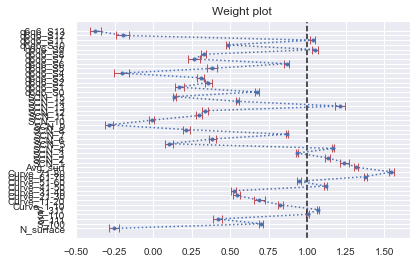

In [21]:
from matplotlib import pyplot as plt


x = feature_names
y = weights_mean
fig, ax = plt.subplots(nrows=1, sharex=True)
ax.errorbar(y, x, xerr=weights_std, fmt='.:', elinewidth=1, capsize=4, color='b', ecolor='r')
ax.set_title('Weight plot')
# ax.set_yticklabels(labels, fontsize=8)
ax.tick_params(axis='both', labelsize=10)
ax.axvline(1, color="k", linestyle="--")
# ax.set_xlabel('weight')
# ax.set_facecolor("none")
# ax.grid(b=False)
fig.savefig('./Gold/{}_weight_plot.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

In [38]:
a = []
for i in range(50):
    weights_mean = np.abs(np.subtract(weights[:i], 1)).mean(axis=0)
    a.append(utilities.rank_importance(feature_names, weights_mean))

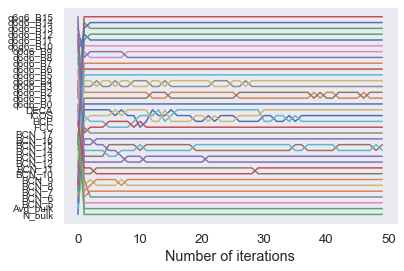

In [40]:
a = np.array(a)
# print(a)
b = [i for i in range(50)]
for i in range(35):
    plt.plot(b, a[:,i])
plt.yticks([i for i in range(1,36)], feature_names, fontsize=10)
plt.xlabel("Number of iterations")
plt.grid(b=None)

# plt.savefig('./Gold/{}_training_interation_converge.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

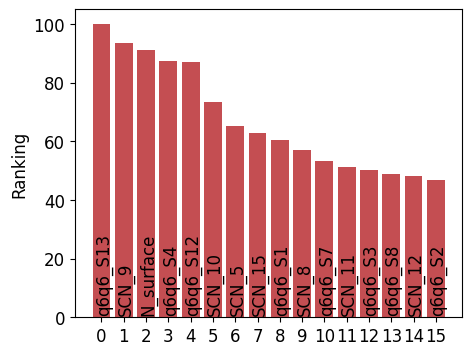

In [16]:
plt.style.use('default')

fig_FI_Weight_unimportant = plot_feature_importance_reverse(feature_names, weights_scaled, 15)
fig_FI_Weight_unimportant.savefig('./New_figures/surface/{}_hist_TV_only.png'.format(name_prefix), dpi = 300, bbox_inches='tight')


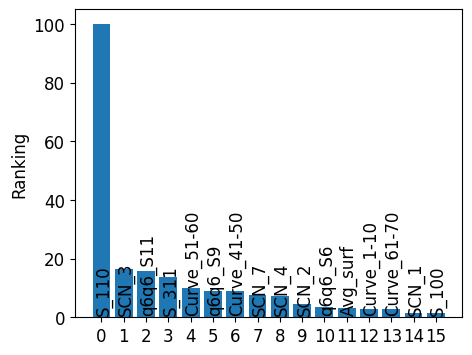

In [17]:
fig_FI_VT = plot_feature_importance(feature_names, np.abs((weights_mean)/(weights_std*weights_scaled)), 15)
fig_FI_VT.savefig('./New_figures/surface/{}_hist_VT.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

In [24]:
# Benchmark
# Evaluate the model on the test data using `evaluate`
base_model = tf.keras.models.load_model('./Gold/base_model_surface.h5')

base_model.trainable = False
print("Evaluate on test data")
results = base_model.evaluate(X_train, y_train, batch_size=10)
print("test loss, test acc:", results)

Evaluate on test data


2021-12-29 10:21:34.910886: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


320/320 [==============================] - 0s 558us/step - loss: 0.0421 - mae: 0.1355
test loss, test acc: [0.042136162519454956, 0.1355171799659729]


In [25]:
# Baseline
array_aux = np.zeros(np.shape(X_train))
results = base_model.evaluate(array_aux, y_train, batch_size=10)

320/320 [==============================] - 0s 460us/step - loss: 0.9931 - mae: 0.7441


In [26]:
# Individula contribution
single_contribution_set = []
for i in range(len(X_train[-1])):
    aux_array = []
    array_aux = np.zeros(np.shape(X_train))
    array_aux[:, i] = X_train[:, i]
    results = base_model.evaluate(array_aux, y_train, batch_size=10)
    
    aux_array.append(results[0])
    aux_array.append(results[1])
    single_contribution_set.append(aux_array)

320/320 [==============================] - 0s 436us/step - loss: 0.9927 - mae: 0.7439


In [28]:
# All contribution
# Set each feature to be 0 and calculate the drop of change as its contribution
# it is different from permutation method, providing permutation method results
contribution_set = []
for i in range(len(X_train[-1])):
    aux_array = []
    array_aux = np.ones(np.shape(X_train))
    array_aux[:,i] = 0
    X_new = array_aux * X_train
    results_new = base_model.evaluate(X_new, y_train, batch_size=10)
    aux_array.append(results_new[0])
    aux_array.append(results_new[1])
    contribution_set.append(aux_array)

320/320 [==============================] - 0s 442us/step - loss: 0.0422 - mae: 0.1355


In [30]:
# Individual contribution of each single feature
# Compare this with permutation method
# Can be used to calculate feature interaction
contribution_set = np.round(contribution_set, 4)
for i in range(len(contribution_set)):
    contribution_set[i] = abs(contribution_set[i][0]-0.0421)
contribution_set

array([[0.037 , 0.037 ],
       [0.0093, 0.0093],
       [0.0267, 0.0267],
       [0.2265, 0.2265],
       [0.0197, 0.0197],
       [0.8694, 0.8694],
       [0.0402, 0.0402],
       [0.1247, 0.1247],
       [0.0218, 0.0218],
       [0.0225, 0.0225],
       [0.0352, 0.0352],
       [0.0406, 0.0406],
       [0.0419, 0.0419],
       [0.041 , 0.041 ],
       [0.0421, 0.0421],
       [0.0421, 0.0421],
       [0.0416, 0.0416],
       [0.0394, 0.0394],
       [0.0411, 0.0411],
       [0.0177, 0.0177],
       [0.8808, 0.8808],
       [0.0178, 0.0178],
       [0.0129, 0.0129],
       [0.0255, 0.0255],
       [0.025 , 0.025 ],
       [0.0361, 0.0361],
       [0.042 , 0.042 ],
       [0.0421, 0.0421],
       [0.0421, 0.0421],
       [0.3108, 0.3108],
       [0.0382, 0.0382],
       [0.0362, 0.0362],
       [0.0343, 0.0343],
       [0.0421, 0.0421],
       [0.0316, 0.0316],
       [0.016 , 0.016 ],
       [0.041 , 0.041 ],
       [0.012 , 0.012 ],
       [0.1598, 0.1598],
       [0.0634, 0.0634],


In [31]:
# We find the contribution and coefficient relationship through previous method (benchmark)
weights_output = np.zeros(np.shape(weights))
X_data = []
y_data = []
contribution_set = np.round(contribution_set, 4)
for j in range(len(weights)):
    for i in range(len(X_train[-1])):
        array_aux = np.ones(np.shape(X_train))
        array_aux[:,i] = 1-weights[j][i]
#         banchmark
        con_feature = contribution_set[i][0]
        X_new = array_aux * X_train
        results_new = base_model.evaluate(X_new, y_train, batch_size=10)
        results_round = np.round(results_new[0],4)
#         the loss change to banchmark
        con = abs(0.0421-results_new[0])
#         weights_output[j][i] = con/con_feature
        
        weight = weights[j][i]
        print(con, weight)

        weights_output[j][i] = con/con_feature

#     break

320/320 [==============================] - 0s 509us/step - loss: 0.0429 - mae: 0.1349
0.0007850874304771438 -0.28053445
320/320 [==============================] - 0s 486us/step - loss: 0.0682 - mae: 0.1610
0.02614719160795212 0.7135726
320/320 [==============================] - 0s 487us/step - loss: 0.0451 - mae: 0.1387
0.003009856873750688 0.42768422
320/320 [==============================] - 0s 607us/step - loss: 0.3066 - mae: 0.3118
0.2644732717514038 0.9923508
320/320 [==============================] - 0s 495us/step - loss: 0.1119 - mae: 0.1924
0.06981949993371964 1.0621356
320/320 [==============================] - 0s 463us/step - loss: 0.6589 - mae: 0.5202
0.6167545441627502 0.82184434
320/320 [==============================] - 0s 497us/step - loss: 0.0430 - mae: 0.1347
0.0008512709379196182 0.6588969
320/320 [==============================] - 0s 485us/step - loss: 0.0868 - mae: 0.2193
0.044666578257083894 0.5252126
320/320 [==============================] - 0s 455us/step - loss:

320/320 [==============================] - 0s 437us/step - loss: 0.0673 - mae: 0.1868
0.025220868372917177 1.1245692
320/320 [==============================] - 0s 424us/step - loss: 0.0484 - mae: 0.1430
0.006276984894275667 0.94518924
320/320 [==============================] - 0s 419us/step - loss: 0.0449 - mae: 0.1380
0.0027652841150760665 1.3884841
320/320 [==============================] - 0s 417us/step - loss: 0.0425 - mae: 0.1358
0.00039564185738563684 1.5604199
320/320 [==============================] - 0s 421us/step - loss: 0.0440 - mae: 0.1440
0.0019337173640728011 1.3253242
320/320 [==============================] - 0s 423us/step - loss: 0.0421 - mae: 0.1355
5.136048793791259e-06 1.26269
320/320 [==============================] - 0s 419us/step - loss: 0.0421 - mae: 0.1355
1.082309484481958e-05 1.1345476
320/320 [==============================] - 0s 420us/step - loss: 0.0425 - mae: 0.1369
0.00036956482529640344 0.94104975
320/320 [==============================] - 0s 417us/step

320/320 [==============================] - 0s 504us/step - loss: 0.0422 - mae: 0.1355
9.027981162071375e-05 0.10354929
320/320 [==============================] - 0s 418us/step - loss: 0.0464 - mae: 0.1399
0.0042876910507679 0.38941744
320/320 [==============================] - 0s 422us/step - loss: 0.7524 - mae: 0.6258
0.7102956298828125 0.8767894
320/320 [==============================] - 0s 430us/step - loss: 0.0428 - mae: 0.1401
0.0006676588296890273 0.18656251
320/320 [==============================] - 0s 434us/step - loss: 0.0449 - mae: 0.1374
0.002839886778593065 -0.2756789
320/320 [==============================] - 0s 443us/step - loss: 0.0422 - mae: 0.1352
0.0001428399324417129 -0.019887714
320/320 [==============================] - 0s 450us/step - loss: 0.0439 - mae: 0.1370
0.0018376197755336776 0.31098086
320/320 [==============================] - 0s 423us/step - loss: 0.0430 - mae: 0.1352
0.0009379807949066177 0.35672694
320/320 [==============================] - 0s 418us/st

320/320 [==============================] - 0s 430us/step - loss: 0.0421 - mae: 0.1354
2.351143360138086e-05 0.56136423
320/320 [==============================] - 0s 422us/step - loss: 0.0421 - mae: 0.1355
1.759567260742334e-05 0.13818102
320/320 [==============================] - 0s 430us/step - loss: 0.2089 - mae: 0.2843
0.16678622105121613 0.68862385
320/320 [==============================] - 0s 417us/step - loss: 0.0422 - mae: 0.1350
0.00014896058440208582 0.18515234
320/320 [==============================] - 0s 411us/step - loss: 0.0430 - mae: 0.1346
0.0008584346711635604 0.3482073
320/320 [==============================] - 0s 420us/step - loss: 0.0431 - mae: 0.1347
0.00100709983110428 0.30806524
320/320 [==============================] - 0s 419us/step - loss: 0.0421 - mae: 0.1355
3.525354862213281e-05 -0.21894716
320/320 [==============================] - 0s 421us/step - loss: 0.0445 - mae: 0.1360
0.0023971285760402694 0.42996365
320/320 [==============================] - 0s 421us

320/320 [==============================] - 0s 421us/step - loss: 0.0421 - mae: 0.1361
2.096333503723291e-05 0.22971734
320/320 [==============================] - 0s 426us/step - loss: 0.0496 - mae: 0.1427
0.007474710428714754 0.35451055
320/320 [==============================] - 0s 420us/step - loss: 0.2627 - mae: 0.3146
0.22064433732032776 1.0448471
320/320 [==============================] - 0s 418us/step - loss: 0.0685 - mae: 0.1669
0.026374173545837404 0.48820657
320/320 [==============================] - 0s 422us/step - loss: 0.1483 - mae: 0.2152
0.10619780161380768 1.0230209
320/320 [==============================] - 0s 421us/step - loss: 0.0421 - mae: 0.1355
4.723035693168787e-05 -0.22289279
320/320 [==============================] - 0s 415us/step - loss: 0.0421 - mae: 0.1355
3.175922632217554e-05 -0.32712483
320/320 [==============================] - 0s 413us/step - loss: 0.0427 - mae: 0.1348
0.0005934808492660537 -0.2335333
320/320 [==============================] - 0s 417us/st

320/320 [==============================] - 0s 431us/step - loss: 0.0451 - mae: 0.1387
0.003041592621803285 0.43006778
320/320 [==============================] - 0s 426us/step - loss: 0.3046 - mae: 0.3109
0.2624616745948791 0.98857355
320/320 [==============================] - 0s 423us/step - loss: 0.1119 - mae: 0.1924
0.06980066486597061 1.0619948
320/320 [==============================] - 0s 420us/step - loss: 0.6620 - mae: 0.5215
0.6198973182678222 0.82394594
320/320 [==============================] - 0s 419us/step - loss: 0.0430 - mae: 0.1348
0.0009213063955307021 0.6870671
320/320 [==============================] - 0s 418us/step - loss: 0.0871 - mae: 0.2197
0.0449649516582489 0.5269103
320/320 [==============================] - 0s 419us/step - loss: 0.0597 - mae: 0.1712
0.017559309685230257 0.5353746
320/320 [==============================] - 0s 423us/step - loss: 0.0670 - mae: 0.1862
0.024856378519535066 1.1169498
320/320 [==============================] - 0s 426us/step - loss: 0.

320/320 [==============================] - 0s 426us/step - loss: 0.0449 - mae: 0.1381
0.0028271313846111312 1.4052246
320/320 [==============================] - 0s 420us/step - loss: 0.0425 - mae: 0.1358
0.00038527437448501733 1.5298913
320/320 [==============================] - 0s 417us/step - loss: 0.0440 - mae: 0.1438
0.0018607873558998123 1.2995067
320/320 [==============================] - 0s 422us/step - loss: 0.0421 - mae: 0.1355
6.164228916166747e-06 1.3079293
320/320 [==============================] - 0s 423us/step - loss: 0.0421 - mae: 0.1355
1.0659182071687257e-05 1.112456
320/320 [==============================] - 0s 424us/step - loss: 0.0425 - mae: 0.1369
0.0003628220498561874 0.93634766
320/320 [==============================] - 0s 467us/step - loss: 0.0462 - mae: 0.1473
0.004114971691370012 1.1806307
320/320 [==============================] - 0s 424us/step - loss: 0.0422 - mae: 0.1355
8.908771872520593e-05 0.101466075
320/320 [==============================] - 0s 428us/s

320/320 [==============================] - 0s 418us/step - loss: 0.7407 - mae: 0.6208
0.6985893372535705 0.86950195
320/320 [==============================] - 0s 480us/step - loss: 0.0431 - mae: 0.1415
0.0010124530732631698 0.2243106
320/320 [==============================] - 0s 424us/step - loss: 0.0458 - mae: 0.1385
0.0037159260451793685 -0.3194516
320/320 [==============================] - 0s 422us/step - loss: 0.0421 - mae: 0.1357
1.5150666236862786e-06 0.012287135
320/320 [==============================] - 0s 422us/step - loss: 0.0435 - mae: 0.1365
0.0014394085943698898 0.2721373
320/320 [==============================] - 0s 422us/step - loss: 0.0430 - mae: 0.1352
0.0008922826588153854 0.3463299
320/320 [==============================] - 0s 416us/step - loss: 0.0422 - mae: 0.1358
7.10833907127395e-05 1.2321656
320/320 [==============================] - 0s 415us/step - loss: 0.0421 - mae: 0.1354
2.3481631278993165e-05 0.5572743
320/320 [==============================] - 0s 417us/st

320/320 [==============================] - 0s 420us/step - loss: 0.1892 - mae: 0.2708
0.14712221660614014 0.6469728
320/320 [==============================] - 0s 419us/step - loss: 0.0422 - mae: 0.1350
0.00012482815384864954 0.1661568
320/320 [==============================] - 0s 418us/step - loss: 0.0429 - mae: 0.1346
0.0008198257625103011 0.3390034
320/320 [==============================] - 0s 423us/step - loss: 0.0429 - mae: 0.1346
0.0007985543549060836 0.26576692
320/320 [==============================] - 0s 419us/step - loss: 0.0421 - mae: 0.1355
3.514924049377588e-05 -0.24957699
320/320 [==============================] - 0s 420us/step - loss: 0.0439 - mae: 0.1355
0.0017566170632839218 0.3555456
320/320 [==============================] - 0s 421us/step - loss: 0.0843 - mae: 0.1910
0.042190847182273866 0.8462607
320/320 [==============================] - 0s 423us/step - loss: 0.0421 - mae: 0.1362
2.8428816795350587e-05 0.2539112
320/320 [==============================] - 0s 417us/st

320/320 [==============================] - 0s 428us/step - loss: 0.2751 - mae: 0.3215
0.2330152515411377 1.0734295
320/320 [==============================] - 0s 420us/step - loss: 0.0686 - mae: 0.1671
0.02647336312532425 0.48916796
320/320 [==============================] - 0s 418us/step - loss: 0.1445 - mae: 0.2131
0.10244138278961182 1.0047705
320/320 [==============================] - 0s 418us/step - loss: 0.0421 - mae: 0.1355
4.4950479269029175e-05 -0.18019655
320/320 [==============================] - 0s 417us/step - loss: 0.0421 - mae: 0.1355
3.086515665054468e-05 -0.4010425
320/320 [==============================] - 0s 427us/step - loss: 0.0428 - mae: 0.1349
0.0007118743002414718 -0.2633337
320/320 [==============================] - 0s 423us/step - loss: 0.0673 - mae: 0.1605
0.025249411547183992 0.70121753
320/320 [==============================] - 0s 426us/step - loss: 0.0454 - mae: 0.1390
0.003253263616561891 0.44566086
320/320 [==============================] - 0s 428us/step 

320/320 [==============================] - 0s 434us/step - loss: 0.1139 - mae: 0.1935
0.0718146015048027 1.0769632
320/320 [==============================] - 0s 425us/step - loss: 0.6434 - mae: 0.5141
0.6013470415115356 0.81146187
320/320 [==============================] - 0s 415us/step - loss: 0.0430 - mae: 0.1347
0.0008602675139904037 0.6625722
320/320 [==============================] - 0s 416us/step - loss: 0.0943 - mae: 0.2295
0.052219410622119905 0.5665739
320/320 [==============================] - 0s 422us/step - loss: 0.0601 - mae: 0.1719
0.01799437143802643 0.5416805
320/320 [==============================] - 0s 425us/step - loss: 0.0671 - mae: 0.1864
0.024968189382553102 1.1192936
320/320 [==============================] - 0s 427us/step - loss: 0.0486 - mae: 0.1434
0.006532096499204637 0.9668404
320/320 [==============================] - 0s 423us/step - loss: 0.0448 - mae: 0.1380
0.0027418334126472488 1.3820966
320/320 [==============================] - 0s 421us/step - loss: 0

320/320 [==============================] - 0s 419us/step - loss: 0.0440 - mae: 0.1438
0.0018621917903423324 1.3000063
320/320 [==============================] - 0s 413us/step - loss: 0.0421 - mae: 0.1355
4.186099767683471e-06 1.2225453
320/320 [==============================] - 0s 418us/step - loss: 0.0421 - mae: 0.1355
1.0677808523179566e-05 1.1154104
320/320 [==============================] - 0s 415us/step - loss: 0.0425 - mae: 0.1368
0.0003531660974025741 0.9295362
320/320 [==============================] - 0s 415us/step - loss: 0.0461 - mae: 0.1469
0.003973209494352342 1.1639534
320/320 [==============================] - 0s 415us/step - loss: 0.0422 - mae: 0.1355
7.993095517158655e-05 0.08527049
320/320 [==============================] - 0s 419us/step - loss: 0.0463 - mae: 0.1398
0.004221678906679155 0.3860135
320/320 [==============================] - 0s 422us/step - loss: 0.7394 - mae: 0.6203
0.6973306063652038 0.86871415
320/320 [==============================] - 0s 448us/step -

320/320 [==============================] - 0s 471us/step - loss: 0.0448 - mae: 0.1373
0.0027086373507976547 -0.26856348
320/320 [==============================] - 0s 444us/step - loss: 0.0422 - mae: 0.1353
9.24069523811355e-05 -0.011754329
320/320 [==============================] - 0s 431us/step - loss: 0.0442 - mae: 0.1374
0.002087773019075395 0.33321285
320/320 [==============================] - 0s 421us/step - loss: 0.0430 - mae: 0.1352
0.0009241785943508163 0.3536114
320/320 [==============================] - 0s 468us/step - loss: 0.0422 - mae: 0.1358
7.178001999855188e-05 1.2472006
320/320 [==============================] - 0s 518us/step - loss: 0.0421 - mae: 0.1354
2.3254388570786988e-05 0.5302851
320/320 [==============================] - 0s 424us/step - loss: 0.0421 - mae: 0.1355
1.6239666938783204e-05 0.14927384
320/320 [==============================] - 0s 424us/step - loss: 0.2022 - mae: 0.2798
0.16008956470489502 0.6747299
320/320 [==============================] - 0s 425us

320/320 [==============================] - 0s 431us/step - loss: 0.0430 - mae: 0.1346
0.000898529970645906 0.3575483
320/320 [==============================] - 0s 420us/step - loss: 0.0432 - mae: 0.1347
0.0010880317628383651 0.3232897
320/320 [==============================] - 0s 420us/step - loss: 0.0421 - mae: 0.1355
3.542491197586206e-05 -0.17213814
320/320 [==============================] - 0s 423us/step - loss: 0.0444 - mae: 0.1360
0.002300919228792192 0.41946816
320/320 [==============================] - 0s 424us/step - loss: 0.0879 - mae: 0.1957
0.04584120699167252 0.883723
320/320 [==============================] - 0s 424us/step - loss: 0.0421 - mae: 0.1360
1.7625474929811036e-05 0.21654928
320/320 [==============================] - 0s 424us/step - loss: 0.0489 - mae: 0.1419
0.006847077244520189 0.33812138
320/320 [==============================] - 0s 426us/step - loss: 0.2596 - mae: 0.3128
0.21751849093437195 1.0374993
320/320 [==============================] - 0s 424us/step -

320/320 [==============================] - 0s 424us/step - loss: 0.1529 - mae: 0.2177
0.11082797982692719 1.0450782
320/320 [==============================] - 0s 423us/step - loss: 0.0421 - mae: 0.1355
4.824363589286951e-05 -0.241014
320/320 [==============================] - 0s 425us/step - loss: 0.0421 - mae: 0.1355
3.125258684158472e-05 -0.3692036
320/320 [==============================] - 0s 418us/step - loss: 0.0428 - mae: 0.1349
0.0006976809442043319 -0.2598962
320/320 [==============================] - 0s 412us/step - loss: 0.0667 - mae: 0.1601
0.02462108918428421 0.69243973
320/320 [==============================] - 0s 422us/step - loss: 0.0454 - mae: 0.1391
0.003337984168529512 0.4517578
320/320 [==============================] - 0s 424us/step - loss: 0.3057 - mae: 0.3114
0.2635983649730682 0.99070966
320/320 [==============================] - 0s 427us/step - loss: 0.1119 - mae: 0.1924
0.06981476881504059 1.0620998
320/320 [==============================] - 0s 428us/step - los

320/320 [==============================] - 0s 425us/step - loss: 0.0431 - mae: 0.1348
0.0009711172521114364 0.70642877
320/320 [==============================] - 0s 420us/step - loss: 0.0955 - mae: 0.2311
0.053440501177310945 0.5729726
320/320 [==============================] - 0s 424us/step - loss: 0.0592 - mae: 0.1705
0.017118946844339372 0.5289112
320/320 [==============================] - 0s 413us/step - loss: 0.0678 - mae: 0.1875
0.025720638418197633 1.1349277
320/320 [==============================] - 0s 424us/step - loss: 0.0484 - mae: 0.1431
0.0063465509653091445 0.95113724
320/320 [==============================] - 0s 420us/step - loss: 0.0448 - mae: 0.1379
0.002667912477254869 1.3617655
320/320 [==============================] - 0s 423us/step - loss: 0.0425 - mae: 0.1358
0.00039070212244987634 1.5459245
320/320 [==============================] - 0s 417us/step - loss: 0.0440 - mae: 0.1440
0.0019305508673191085 1.3242074
320/320 [==============================] - 0s 419us/step 

320/320 [==============================] - 0s 450us/step - loss: 0.0421 - mae: 0.1355
1.076349020004419e-05 1.1246485
320/320 [==============================] - 0s 454us/step - loss: 0.0425 - mae: 0.1368
0.00035096072554588464 0.9279718
320/320 [==============================] - 0s 487us/step - loss: 0.0461 - mae: 0.1470
0.004000798994302751 1.1672218
320/320 [==============================] - 0s 474us/step - loss: 0.0422 - mae: 0.1355
5.535148978233484e-05 0.039149918
320/320 [==============================] - 0s 468us/step - loss: 0.0456 - mae: 0.1387
0.0034566868185997024 0.3444467
320/320 [==============================] - 0s 453us/step - loss: 0.7361 - mae: 0.6188
0.6939973358154297 0.86662656
320/320 [==============================] - 0s 465us/step - loss: 0.0427 - mae: 0.1397
0.0005595844328403488 0.17272583
320/320 [==============================] - 0s 444us/step - loss: 0.0448 - mae: 0.1373
0.002731510633230211 -0.26981637
320/320 [==============================] - 0s 445us/st

320/320 [==============================] - 0s 478us/step - loss: 0.0437 - mae: 0.1367
0.0016354072928428665 0.29185852
320/320 [==============================] - 0s 447us/step - loss: 0.0430 - mae: 0.1352
0.0008860986769199386 0.34490225
320/320 [==============================] - 0s 465us/step - loss: 0.0422 - mae: 0.1358
7.095300555229334e-05 1.2293304
320/320 [==============================] - 0s 465us/step - loss: 0.0421 - mae: 0.1354
2.333634495735315e-05 0.5392569
320/320 [==============================] - 0s 460us/step - loss: 0.0421 - mae: 0.1355
1.9063436985017335e-05 0.12635452
320/320 [==============================] - 0s 454us/step - loss: 0.1963 - mae: 0.2758
0.15424169340133667 0.6623572
320/320 [==============================] - 0s 462us/step - loss: 0.0422 - mae: 0.1351
9.260811805725244e-05 0.13620985
320/320 [==============================] - 0s 457us/step - loss: 0.0429 - mae: 0.1346
0.0008450236260890975 0.345034
320/320 [==============================] - 0s 469us/st

320/320 [==============================] - 0s 459us/step - loss: 0.0421 - mae: 0.1355
3.5510593652726685e-05 -0.1575874
320/320 [==============================] - 0s 423us/step - loss: 0.0441 - mae: 0.1357
0.0020299527883529678 0.38869613
320/320 [==============================] - 0s 422us/step - loss: 0.0898 - mae: 0.1980
0.04765832909345627 0.9018149
320/320 [==============================] - 0s 413us/step - loss: 0.0421 - mae: 0.1362
3.897883892059473e-05 0.28134334
320/320 [==============================] - 0s 417us/step - loss: 0.0492 - mae: 0.1422
0.007102248454093935 0.344872
320/320 [==============================] - 0s 424us/step - loss: 0.2618 - mae: 0.3140
0.2196655098438263 1.042552
320/320 [==============================] - 0s 424us/step - loss: 0.0694 - mae: 0.1681
0.027342689418792726 0.49751455
320/320 [==============================] - 0s 420us/step - loss: 0.1532 - mae: 0.2179
0.11106900610923767 1.046214
320/320 [==============================] - 0s 415us/step - loss

320/320 [==============================] - 0s 465us/step - loss: 0.0421 - mae: 0.1355
3.0958288908006226e-05 -0.3930959
320/320 [==============================] - 0s 466us/step - loss: 0.0428 - mae: 0.1349
0.0007062826395034805 -0.26198128
320/320 [==============================] - 0s 479us/step - loss: 0.0670 - mae: 0.1603
0.024943058574199678 0.6969516
320/320 [==============================] - 0s 464us/step - loss: 0.0451 - mae: 0.1386
0.0029848005712032333 0.42579347
320/320 [==============================] - 0s 453us/step - loss: 0.3082 - mae: 0.3126
0.26609031596183774 0.9953761
320/320 [==============================] - 0s 461us/step - loss: 0.1132 - mae: 0.1931
0.07105417289733887 1.0713357
320/320 [==============================] - 0s 486us/step - loss: 0.6744 - mae: 0.5263
0.6323024157524109 0.83219063
320/320 [==============================] - 0s 458us/step - loss: 0.0431 - mae: 0.1348
0.0010006103754043594 0.7176587
320/320 [==============================] - 0s 467us/step -

320/320 [==============================] - 0s 432us/step - loss: 0.0598 - mae: 0.1715
0.017723192656040193 0.53775865
320/320 [==============================] - 0s 449us/step - loss: 0.0678 - mae: 0.1875
0.025717218601703645 1.1348579
320/320 [==============================] - 0s 424us/step - loss: 0.0483 - mae: 0.1428
0.006160752111673357 0.9351826
320/320 [==============================] - 0s 419us/step - loss: 0.0448 - mae: 0.1380
0.0027241271078586593 1.3772525
320/320 [==============================] - 0s 424us/step - loss: 0.0425 - mae: 0.1358
0.0003891896545887008 1.5415118
320/320 [==============================] - 0s 423us/step - loss: 0.0440 - mae: 0.1439
0.001904980474710466 1.3152062
320/320 [==============================] - 0s 423us/step - loss: 0.0421 - mae: 0.1355
4.800772666929687e-06 1.2485658
320/320 [==============================] - 0s 422us/step - loss: 0.0421 - mae: 0.1355
1.10950410366073e-05 1.1656401
320/320 [==============================] - 0s 422us/step - l

320/320 [==============================] - 0s 424us/step - loss: 0.0461 - mae: 0.1469
0.003964414083957674 1.1629095
320/320 [==============================] - 0s 423us/step - loss: 0.0422 - mae: 0.1355
0.0001057285904884353 0.12982222
320/320 [==============================] - 0s 425us/step - loss: 0.0463 - mae: 0.1398
0.004245371752977373 0.3872376
320/320 [==============================] - 0s 428us/step - loss: 0.7524 - mae: 0.6258
0.7103309754371643 0.8768114
320/320 [==============================] - 0s 415us/step - loss: 0.0433 - mae: 0.1422
0.001214173817634584 0.24335901
320/320 [==============================] - 0s 420us/step - loss: 0.0448 - mae: 0.1373
0.002719343835115434 -0.26915032
320/320 [==============================] - 0s 416us/step - loss: 0.0423 - mae: 0.1352
0.00015702583789825586 -0.021933598
320/320 [==============================] - 0s 430us/step - loss: 0.0437 - mae: 0.1367
0.0016375865876674667 0.2920712
320/320 [==============================] - 0s 421us/ste

320/320 [==============================] - 0s 418us/step - loss: 0.0422 - mae: 0.1358
7.020422220230249e-05 1.2130846
320/320 [==============================] - 0s 422us/step - loss: 0.0421 - mae: 0.1354
2.3328894376756226e-05 0.53949714
320/320 [==============================] - 0s 410us/step - loss: 0.0421 - mae: 0.1355
1.570695042610315e-05 0.15364489
320/320 [==============================] - 0s 425us/step - loss: 0.2017 - mae: 0.2794
0.1595780823469162 0.67365664
320/320 [==============================] - 0s 507us/step - loss: 0.0422 - mae: 0.1351
7.388480901718286e-05 0.11473412
320/320 [==============================] - 0s 491us/step - loss: 0.0429 - mae: 0.1346
0.000812654578685762 0.3372689
320/320 [==============================] - 0s 414us/step - loss: 0.0430 - mae: 0.1346
0.0008591313004493728 0.27856642
320/320 [==============================] - 0s 421us/step - loss: 0.0421 - mae: 0.1355
3.546589016914514e-05 -0.16064617
320/320 [==============================] - 0s 418us/

320/320 [==============================] - 0s 521us/step - loss: 0.0848 - mae: 0.1917
0.04267079123258591 0.8512761
320/320 [==============================] - 0s 480us/step - loss: 0.0421 - mae: 0.1362
2.724789977073816e-05 0.25049242
320/320 [==============================] - 0s 476us/step - loss: 0.0489 - mae: 0.1418
0.006750711435079576 0.33554003
320/320 [==============================] - 0s 478us/step - loss: 0.2632 - mae: 0.3148
0.22107459344863892 1.0458546
320/320 [==============================] - 0s 505us/step - loss: 0.0677 - mae: 0.1660
0.02556827404499054 0.48033056
320/320 [==============================] - 0s 478us/step - loss: 0.1496 - mae: 0.2159
0.1075036946773529 1.02929
320/320 [==============================] - 0s 480us/step - loss: 0.0421 - mae: 0.1355
4.491695165634302e-05 -0.17971125
320/320 [==============================] - 0s 489us/step - loss: 0.0421 - mae: 0.1355
3.127121329307703e-05 -0.3673065
320/320 [==============================] - 0s 498us/step - los

320/320 [==============================] - 0s 463us/step - loss: 0.0664 - mae: 0.1599
0.02433771380186081 0.6884436
320/320 [==============================] - 0s 445us/step - loss: 0.0448 - mae: 0.1383
0.0027174178600311294 0.40508452
320/320 [==============================] - 0s 495us/step - loss: 0.3060 - mae: 0.3116
0.2639296773910522 0.9913315
320/320 [==============================] - 0s 480us/step - loss: 0.1147 - mae: 0.1940
0.07259768732786179 1.0827261
320/320 [==============================] - 0s 463us/step - loss: 0.6826 - mae: 0.5295
0.6404709342956543 0.83757555
320/320 [==============================] - 0s 464us/step - loss: 0.0431 - mae: 0.1348
0.0010319139897823348 0.7293888
320/320 [==============================] - 0s 438us/step - loss: 0.0913 - mae: 0.2254
0.04915695377588272 0.55018926
320/320 [==============================] - 0s 451us/step - loss: 0.0609 - mae: 0.1731
0.018805586928129198 0.5532384
320/320 [==============================] - 0s 458us/step - loss: 0

In [33]:
weights_output = np.insert(weights_output, 0, np.ones(43), 0)

In [87]:
weights_output = np.nan_to_num(weights_output)
pl, weights_contribution = lu(weights_output, permute_l=True)

In [90]:
# weights_contribution = np.nan_to_num(weights_contribution)
solve(weights, np.ones(35))

ValueError: Input a needs to be a square matrix.

[-4.10729442e+01 -7.34855085e+03 -2.14459827e+03 -2.38822142e+03
  1.07141320e+04 -3.85829685e+03  2.75193971e+02 -6.73958351e+03
  1.59631222e+03  3.82046681e+03 -1.18236134e+03 -3.77330676e+03
  7.16146416e+02  1.48030819e+03 -1.06164200e+02  1.43639704e+03
  3.11732799e+03 -2.66794664e+03 -3.72778922e+02  1.68289778e+03
 -2.80106274e+03 -5.77211072e+03  2.94912235e+03  2.41690284e+03
  1.58465370e+03  1.43824335e+03  7.24079066e+00 -4.84340992e+02
 -3.34911083e+03  2.49540593e+03 -1.80114507e+03 -4.29684324e+03
 -2.28924728e+03 -1.89649583e+02 -1.27452243e+03  3.61794508e+03
 -1.11569512e+03  6.21758597e+03 -4.56242472e+02  1.88557647e+03
  1.88669544e+02 -3.96806142e+02  2.84619791e+02]
[ 1.38116768e+00 -8.87115465e+02 -2.68067393e+02 -6.90322288e+02
  1.64931807e+03 -5.70620246e+02  7.76438181e+01 -9.65661295e+02
  3.52657652e+02  4.20421243e+02 -2.43560382e+02 -5.98864930e+02
  2.02007457e+02  2.00517267e+02  1.07915077e+00  2.63562208e+02
  5.23131154e+02 -4.27671217e+02 -3.9823

Text(0.5, 0, 'Number of iterations')

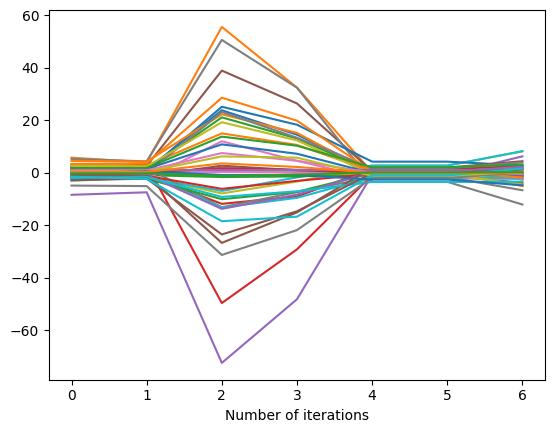

In [18]:
from scipy.linalg import lu
from scipy.linalg import solve

c = []
for i in range(43, 50):
    pl, weights_contribution = lu(weights[0:i], permute_l=True)
    weights_contribution = np.nan_to_num(weights_contribution)
#     print(weights_contribution)
    out = solve(weights_contribution, np.ones(43))
    print(out)
    out = out/out[-9]
    c.append(out)
c = np.array(c)
c_T = c.T
ran = [i for i in range(len(c_T[0]))]
for i in range(len(c_T)):
    plt.plot(ran, c_T[i])
plt.xlabel("Number of iterations")
# plt.savefig('./Gold/{}_contribution_calculation_iteration.png'.format(name_prefix), dpi=300, bbox_inches='tight')


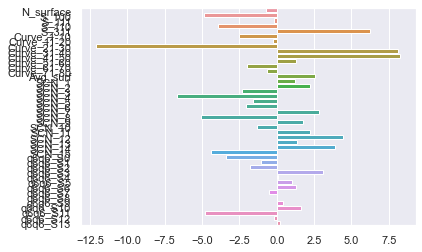

In [37]:
import seaborn as sns; sns.set()
sns.set(color_codes=True)
sns.set(font_scale=1)

sns.barplot(c[-1], feature_names)
plt.savefig('./Gold/{}_contribution_calculation.png'.format(name_prefix), dpi=300, bbox_inches='tight')


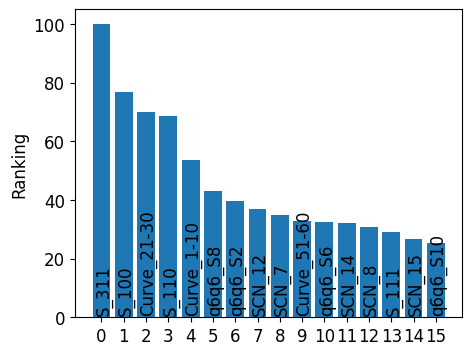

In [19]:
fig_FI_cc = plot_feature_importance(feature_names, c[-5], 15)

In [20]:
fig_FI_cc.savefig('./New_figures/surface/{}_cc.png'.format(name_prefix), dpi=300, bbox_inches='tight')
